# Zomato Data Analysis

#### importing various libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("project 1/Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### Changing rate to float values from string and removing "/"

In [27]:
def handle_Rate(Value):
    Value=str(Value).split("/")
    Value=Value[0];
    return Value

df["rate"]=df["rate"].apply(handle_Rate)
print(df.head())

                    name online_order book_table rate  votes  \
0                  Jalsa          Yes        Yes  4.1    775   
1         Spice Elephant          Yes         No  4.1    787   
2        San Churro Cafe          Yes         No  3.8    918   
3  Addhuri Udupi Bhojana           No         No  3.7     88   
4          Grand Village           No         No  3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### Checking for null values 

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None


#### Hence no null value

#### Type with Highest orders

Text(0, 0.5, 'Frequency')

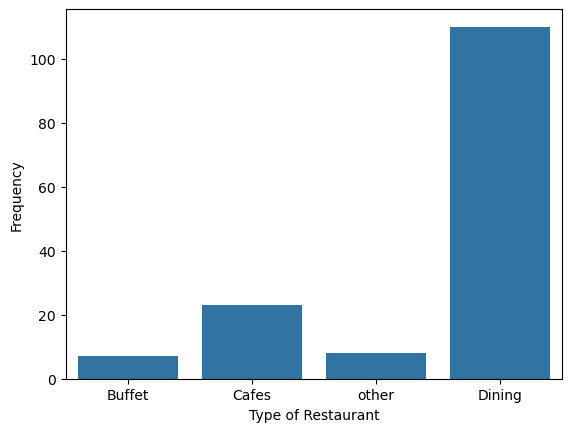

In [49]:
sns.countplot(x=df["listed_in(type)"],data=df)
plt.xlabel("Type of Restaurant")
plt.ylabel("Frequency")

### Conclusion: Dining is the highest chosen option.

#### No. of votes for Each type

Text(0, 0.5, 'count')

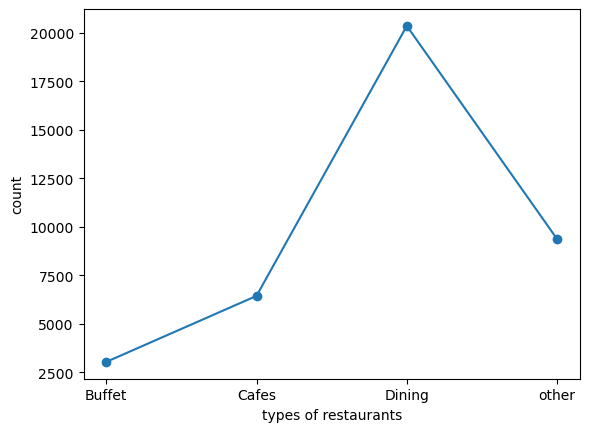

In [128]:
result=df.groupby(["listed_in(type)"])["votes"].sum()
plt.plot(result.index,result.values,marker="o")
plt.xlabel("types of restaurants")
plt.ylabel("count")

#### Conclusion-- Dining option has most votes

#### Avg spending by couples

In [110]:
print(df["approx_cost(for two people)"].mean())

418.2432432432432


Text(0.5, 0, 'Count')

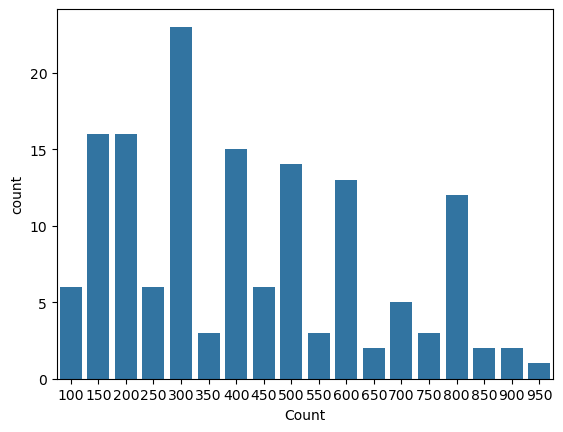

In [120]:
sns.countplot(x=df["approx_cost(for two people)"])
plt.xlabel("Money Spent")
plt.ylabel("Count")

#### Conclusion-- Average spending is 418.24 and maximum people spend in range of 300

#### Heatplot

Text(50.722222222222214, 0.5, 'Types of restaurants')

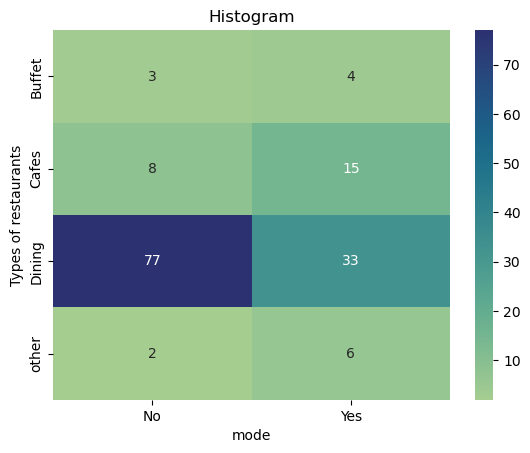

In [205]:
pivot_table=df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size")
sns.heatmap(pivot_table, annot=True,cmap="crest",fmt="d")
plt.title("Histogram")
plt.xlabel("mode")
plt.ylabel("Types of restaurants")


#### Conclusion--- Offline orders are more frequent for dining while online orders for cafes.